In [58]:
pip install contractions

Note: you may need to restart the kernel to use updated packages.


In [59]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [172]:
pip install vaderSentiment

Note: you may need to restart the kernel to use updated packages.


In [374]:
#Citations:

#IMDb Dataset
'''@InProceedings{maas-EtAl:2011:ACL-HLT2011,
  author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},
  title     = {Learning Word Vectors for Sentiment Analysis},
  booktitle = {Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies},
  month     = {June},
  year      = {2011},
  address   = {Portland, Oregon, USA},
  publisher = {Association for Computational Linguistics},
  pages     = {142--150},
  url       = {http://www.aclweb.org/anthology/P11-1015}
}'''

#VADER Sentiment Library
'''Hutto, C.J. & Gilbert, E.E. (2014). VADER: A Parsimonious Rule-based Model for Sentiment Analysis of Social Media Text. 
Eighth International Conference on Weblogs and Social Media (ICWSM-14). Ann Arbor, MI, June 2014.'''

'@InProceedings{maas-EtAl:2011:ACL-HLT2011,\n  author    = {Maas, Andrew L.  and  Daly, Raymond E.  and  Pham, Peter T.  and  Huang, Dan  and  Ng, Andrew Y.  and  Potts, Christopher},\n  title     = {Learning Word Vectors for Sentiment Analysis},\n  booktitle = {Proceedings of the 49th Annual Meeting of the Association for Computational Linguistics: Human Language Technologies},\n  month     = {June},\n  year      = {2011},\n  address   = {Portland, Oregon, USA},\n  publisher = {Association for Computational Linguistics},\n  pages     = {142--150},\n  url       = {http://www.aclweb.org/anthology/P11-1015}\n}'

In [351]:
#Importing libraries
import pandas as pd
import numpy as np
import statistics
# Convention for import of the pyplot interface
import matplotlib.pyplot as plt
import contractions
#Importing packages for string manipulation!
import string
#Importing Natural Language Tool Kit
import nltk
#Importing OS to work with directories
import os
#Importing libraries needed with NLTK
from nltk import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')

from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\abhi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\abhi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\abhi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\abhi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [282]:
#Importing the .txt file
folder_path = "C:\\Abhishek's Folder\\ACM-Research-Coding-Challenge-F21\\"
os.chdir(folder_path)
with open('input.txt') as reader:
    input_words = reader.readlines()

In [342]:
#VADER-implemented approach
analyzer = SentimentIntensityAnalyzer()

sentiment_data = pd.DataFrame(columns=["sentence", "sentence_num",
                                       "sentiment","Ratio of +ve","Ratio of neutral","Ratio of -ve"])
i=1
for sentence in input_words:
    print(sentence)
    if sentence != "\n":
        sentiment_score = analyzer.polarity_scores(sentence)
        sentiment_data.loc[len(sentiment_data.index)]=[sentence,i,sentiment_score['compound'],sentiment_score['pos'], 
                                                sentiment_score['neu'],sentiment_score['neg']]
        print(sentiment_score)
    i=i+1

"Stop blushing. I'm not needling, really I'm not. Do you know, I

{'neg': 0.167, 'neu': 0.833, 'pos': 0.0, 'compound': -0.296}
had a dream an hour ago. I lay down for a cat-nap and in this dream

{'neg': 0.0, 'neu': 0.767, 'pos': 0.233, 'compound': 0.5023}
you and I, Montag, got into a furious debate on books. You towered

{'neg': 0.236, 'neu': 0.764, 'pos': 0.0, 'compound': -0.5719}
with rage, yelled quotes at me. I calmly parried every thrust. Power, I

{'neg': 0.213, 'neu': 0.651, 'pos': 0.136, 'compound': -0.3182}
said, And you, quoting Dr. Johnson, said `Knowledge is more than

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
equivalent to force!' And I said, `Well, Dr. Johnson also said, dear boy,

{'neg': 0.0, 'neu': 0.688, 'pos': 0.312, 'compound': 0.6114}
that "He is no wise man that will quit a certainty for an uncertainty.'"

{'neg': 0.276, 'neu': 0.613, 'pos': 0.111, 'compound': -0.4504}
Stick with the fireman, Montag. All else is dreary chaos!"

{'neg': 0.444, 'neu': 

In [343]:
results = ["positive","negative"]
conditions = [(sentiment_data['sentiment']>=0.05),
             (sentiment_data['sentiment']<=-0.05)]
sentiment_data['results'] = np.select(conditions, results, default="neutral")

In [344]:
sentiment_data

,sentence,sentence_num,sentiment,Ratio of +ve,Ratio of neutral,Ratio of -ve,results
0,"""Stop blushing. I'm not needling, really I'm n...",1,-0.2960,0.000,0.833,0.167,negative
1,had a dream an hour ago. I lay down for a cat-...,2,0.5023,0.233,0.767,0.000,positive
2,"you and I, Montag, got into a furious debate o...",3,-0.5719,0.000,0.764,0.236,negative
3,"with rage, yelled quotes at me. I calmly parri...",4,-0.3182,0.136,0.651,0.213,negative
4,"said, And you, quoting Dr. Johnson, said `Know...",5,0.0000,0.000,1.000,0.000,neutral
5,"equivalent to force!' And I said, `Well, Dr. J...",6,0.6114,0.312,0.688,0.000,positive
6,"that ""He is no wise man that will quit a certa...",7,-0.4504,0.111,0.613,0.276,negative
7,"Stick with the fireman, Montag. All else is dr...",8,-0.7500,0.000,0.556,0.444,negative
8,"""Don't listen,"" whispered Faber. ""He's trying ...",9,-0.2263,0.000,0.808,0.192,negative
9,"slippery. Watch out!""\n",10,0.0000,0.000,1.000,0.000,neutral


Text(0.5, 1.0, 'Analyzing Sentiment Scores Through Input.txt')

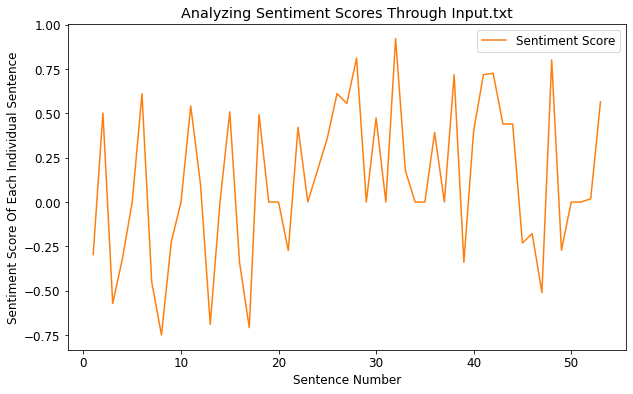

In [345]:
%matplotlib inline
plt.rc('font', size=12)
fig, ax = plt.subplots(figsize=(10, 6))

# Specify how our lines should look
ax.plot(sentiment_data.sentence_num, sentiment_data.sentiment, color='tab:orange', label='Sentiment Score')

#Labelling the axes
ax.set_xlabel("Sentence Number")
ax.set_ylabel("Sentiment Score Of Each Individual Sentence")
ax.legend(loc = "upper right")
ax.set_title("Analyzing Sentiment Scores Through Input.txt")

In [220]:
#Calculating the Overall Score
overall_score = statistics.mean(sentiment_data['sentiment'])
print("The overall score for this paragraph is {}".format(overall_score))

The overall score for this paragraph is 0.11860000000000001


In [ ]:
#Self-Implemented Sentiment Analysis 

In [302]:
#preprocessing for the input words so that we can turn them into things to be analyzed by sentiment analysis!
def preprocessing(word):
    if type(word) == list:
        word = word[0]
    changed_word = ' '.join("Doctor" if letter == "Dr." else letter for letter in word.split())
    
    changed_word = changed_word.lower()
    
    changed_word = contractions.fix(changed_word)
    
    aux_words = set(stopwords.words('english'))
    aux_words.discard('not')
    
    changed_word = ''.join(word for word in changed_word if word not in string.punctuation)
    tokenized_word = word_tokenize(changed_word)
    tokenized_word = [word for word in tokenized_word if word not in aux_words]
    
    return tokenized_word

In [253]:
#Setting up the training dataset the IMDb dataset

#Getting the pos
folder_path = "C:\\Abhishek's Folder\\ACM-Research-Coding-Challenge-F21\\aclImdb\\train\\pos\\"

# Change the directory
os.chdir(folder_path)
train_pos = []
# iterate through all file
for file in os.listdir():
    # Check whether file is in text format or not
    if file.endswith(".txt"):
        # call read text file function
        with open(file, 'r', encoding="utf8") as f:
            train_pos.append(f.readlines())
sentiment_pos = [1]*len(train_pos)
#Getting the neg
folder_path = "C:\\Abhishek's Folder\\ACM-Research-Coding-Challenge-F21\\aclImdb\\train\\neg\\"

# Change the directory
os.chdir(folder_path)
train_neg = []
# iterate through all file
for file in os.listdir():
    # Check whether file is in text format or not
    if file.endswith(".txt"):
        # call read text file function
        with open(file, 'r', encoding="utf8") as f:
            train_neg.append(f.readlines())
sentiment_neg = [-1]*len(train_neg)

train_pos.extend(train_neg)
sentiment_pos.extend(sentiment_neg)

In [304]:
#Applying the preprocessing on the training input
training['processed']=training['Input'].apply(preprocessing)

In [260]:
#Setting up the testing dataset the IMDb dataset

#Getting the pos
folder_path = "C:\\Abhishek's Folder\\ACM-Research-Coding-Challenge-F21\\aclImdb\\test\\pos\\"

# Change the directory
os.chdir(folder_path)
test_pos = []
# iterate through all file
for file in os.listdir():
    # Check whether file is in text format or not
    if file.endswith(".txt"):
        # call read text file function
        with open(file, 'r', encoding="utf8") as f:
            test_pos.append(f.readlines())
sentiment_test_pos = [1]*len(test_pos)
#Getting the neg
folder_path = "C:\\Abhishek's Folder\\ACM-Research-Coding-Challenge-F21\\aclImdb\\test\\neg\\"

# Change the directory
os.chdir(folder_path)
test_neg = []
# iterate through all file
for file in os.listdir():
    # Check whether file is in text format or not
    if file.endswith(".txt"):
        # call read text file function
        with open(file, 'r', encoding="utf8") as f:
            test_neg.append(f.readlines())
sentiment_test_neg = [-1]*len(test_neg)

test_pos.extend(test_neg)
sentiment_test_pos.extend(sentiment_test_neg)

In [305]:
#Applying the preprocessing on the testing dataset
testing = pd.DataFrame(columns =['Input', 'Processed', 'Predicted_Sentiment', 'Actual Sentiment'])
testing['Input'] = test_pos
testing['Actual Sentiment'] = sentiment_test_pos
testing['Processed'] = testing['Input'].apply(preprocessing)

In [306]:
testing

,Input,Processed,Predicted_Sentiment,Actual Sentiment
0,[I went and saw this movie last night after be...,"[went, saw, movie, last, night, coaxed, friend...",NaN,1
1,[Actor turned director Bill Paxton follows up ...,"[actor, turned, director, bill, paxton, follow...",NaN,1
2,[As a recreational golfer with some knowledge ...,"[recreational, golfer, knowledge, sports, hist...",NaN,1
3,"[I saw this film in a sneak preview, and it is...","[saw, film, sneak, preview, delightful, cinema...",NaN,1
4,[Bill Paxton has taken the true story of the 1...,"[bill, paxton, taken, true, story, 1913, us, g...",NaN,1
...,...,...,...,...
24995,[I occasionally let my kids watch this garbage...,"[occasionally, let, kids, watch, garbage, unde...",NaN,-1
24996,[When all we have anymore is pretty much reali...,"[anymore, pretty, much, reality, tv, shows, pe...",NaN,-1
24997,[The basic genre is a thriller intercut with a...,"[basic, genre, thriller, intercut, uncomfortab...",NaN,-1
24998,[Four things intrigued me as to this film - fi...,"[four, things, intrigued, film, firstly, stars...",NaN,-1


In [307]:
training

,Input,Sentiment,processed
0,[Bromwell High is a cartoon comedy. It ran at ...,1,"[bromwell, high, cartoon, comedy, ran, time, p..."
1,[Homelessness (or Houselessness as George Carl...,1,"[homelessness, houselessness, george, carlin, ..."
2,[Brilliant over-acting by Lesley Ann Warren. B...,1,"[brilliant, overacting, lesley, ann, warren, b..."
3,[This is easily the most underrated film inn t...,1,"[easily, underrated, film, inn, brooks, cannon..."
4,[This is not the typical Mel Brooks film. It w...,1,"[not, typical, mel, brooks, film, much, less, ..."
...,...,...,...
24995,"[Towards the end of the movie, I felt it was t...",-1,"[towards, end, movie, felt, technical, felt, l..."
24996,[This is the kind of movie that my enemies con...,-1,"[kind, movie, enemies, content, watch, time, n..."
24997,[I saw 'Descent' last night at the Stockholm F...,-1,"[saw, descent, last, night, stockholm, film, f..."
24998,[Some films that you pick up for a pound turn ...,-1,"[films, pick, pound, turn, rather, good, 23rd,..."


In [308]:
#Converting a data into a vector using the Bag-Of-Words approach to conduct sentiment analysis
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(tokenizer=lambda x: x,
                            preprocessor=lambda x: x)
X_train = vectorizer.fit_transform(training['processed'])
X_test = vectorizer.transform(testing['Processed'])

y_train = training['Sentiment']
y_test = testing['Actual Sentiment']

In [309]:
#Implenting a Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 150)
classifier.fit(X_train, y_train)

RandomForestClassifier(n_estimators=150)

In [310]:
#Testing on testing dataset
y_pred = classifier.predict(X_test)
testing['Predicted_Sentiment'] = y_pred
testing

,Input,Processed,Predicted_Sentiment,Actual Sentiment
0,[I went and saw this movie last night after be...,"[went, saw, movie, last, night, coaxed, friend...",1,1
1,[Actor turned director Bill Paxton follows up ...,"[actor, turned, director, bill, paxton, follow...",1,1
2,[As a recreational golfer with some knowledge ...,"[recreational, golfer, knowledge, sports, hist...",1,1
3,"[I saw this film in a sneak preview, and it is...","[saw, film, sneak, preview, delightful, cinema...",1,1
4,[Bill Paxton has taken the true story of the 1...,"[bill, paxton, taken, true, story, 1913, us, g...",1,1
...,...,...,...,...
24995,[I occasionally let my kids watch this garbage...,"[occasionally, let, kids, watch, garbage, unde...",-1,-1
24996,[When all we have anymore is pretty much reali...,"[anymore, pretty, much, reality, tv, shows, pe...",-1,-1
24997,[The basic genre is a thriller intercut with a...,"[basic, genre, thriller, intercut, uncomfortab...",-1,-1
24998,[Four things intrigued me as to this film - fi...,"[four, things, intrigued, film, firstly, stars...",1,-1


In [311]:
#Evaluating the classifier through confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[10759,  1741],
       [ 1821, 10679]], dtype=int64)

In [312]:
#Evaluating the accuracy of the model
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.85752

In [313]:
#Making a report on the classification metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.86      0.86      0.86     12500
           1       0.86      0.85      0.86     12500

    accuracy                           0.86     25000
   macro avg       0.86      0.86      0.86     25000
weighted avg       0.86      0.86      0.86     25000



In [314]:
#Applying the model on the input.txt file
processed_words = [preprocessing(word) for word in input_words]

In [315]:
processed_words

[['stop', 'blushing', 'I', 'not', 'needling', 'really', 'I', 'not', 'know'],
 ['dream', 'hour', 'ago', 'lay', 'catnap', 'dream'],
 ['montag', 'got', 'furious', 'debate', 'books', 'towered'],
 ['rage', 'yelled', 'quotes', 'calmly', 'parried', 'every', 'thrust', 'power'],
 ['said', 'quoting', 'doctor', 'johnson', 'said', 'knowledge'],
 ['equivalent',
  'force',
  'said',
  'well',
  'doctor',
  'johnson',
  'also',
  'said',
  'dear',
  'boy'],
 ['wise', 'man', 'quit', 'certainty', 'uncertainty'],
 ['stick', 'fireman', 'montag', 'else', 'dreary', 'chaos'],
 ['not', 'listen', 'whispered', 'faber', 'trying', 'confuse'],
 ['slippery', 'watch'],
 ['beatty', 'chuckled', 'said', 'quoting', 'truth', 'come', 'light'],
 ['murder', 'not', 'hid', 'long', 'cried', 'good', 'humour', 'oh', 'god'],
 ['speaks', 'horse', 'devil', 'cite', 'scripture'],
 ['purpose', 'yelled', 'age', 'thinks', 'better', 'gilded', 'fool'],
 ['threadbare', 'saint', 'wisdoms', 'school', 'whispered', 'gently'],
 ['dignity', 'tr

In [316]:
input_test = vectorizer.transform(processed_words)

In [328]:
#Calculating the +ve/-ve sentiment + overall sentiment for each sentiment
positive = classifier.predict_proba(input_test)[:,1]
negative = classifier.predict_proba(input_test)[:,0]
overall = classifier.predict(input_test)

In [370]:
Final_Result = pd.DataFrame(columns=["Sentence","Positive Sentiment", "Negative Sentiment", "Sentiment"])
Final_Result["Sentence"] = input_words
Final_Result["Positive Sentiment"] = positive
Final_Result["Negative Sentiment"] = negative
Final_Result["Sentiment"] = overall

In [371]:
Final_Result

,Sentence,Positive Sentiment,Negative Sentiment,Sentiment
0,"""Stop blushing. I'm not needling, really I'm n...",0.720000,0.280000,1
1,had a dream an hour ago. I lay down for a cat-...,0.733333,0.266667,1
2,"you and I, Montag, got into a furious debate o...",0.706667,0.293333,1
3,"with rage, yelled quotes at me. I calmly parri...",0.766667,0.233333,1
4,"said, And you, quoting Dr. Johnson, said `Know...",0.713333,0.286667,1
5,"equivalent to force!' And I said, `Well, Dr. J...",0.813333,0.186667,1
6,"that ""He is no wise man that will quit a certa...",0.740000,0.260000,1
7,"Stick with the fireman, Montag. All else is dr...",0.713333,0.286667,1
8,"""Don't listen,"" whispered Faber. ""He's trying ...",0.660000,0.340000,1
9,"slippery. Watch out!""\n",0.806667,0.193333,1


In [372]:
#Calculating the Overall Score With Self-Implementation
overall_score = statistics.mean(Final_Result['Sentiment'])
print("The overall score for this paragraph with self-implementation is {}".format(overall_score))

The overall score for this paragraph with self-implementation is 0.9622641509433962


In [373]:
#Calculating the Overall Positive Score With Self-Implementation
overall_score = statistics.mean(Final_Result['Positive Sentiment'])
print("The overall +ve sentiment score for this paragraph with self-implementation is {}".format(overall_score))

The overall +ve sentiment score for this paragraph with self-implementation is 0.7519496855345912
